In [1]:
# module import
import pystan
import numpy as np
import pylab as py
import pandas as pd
%matplotlib inline

In [4]:
seven_scientists_code="""
data {
    int<lower=0> n; // number of scientists
    real sample[n]; // measurements
}
parameters {
    real mu;
    real<lower=0> lambda[n];
}
transformed parameters {
    real<lower=0> sigma[n];
    for (i in 1:n)
        sigma[i] <- 1 / sqrt(lambda[i]);
}
model {
    for (i in 1:n)
        lambda[i] ~ gamma(0.01, 0.01);
    mu ~ normal(0, 30);
    for (i in 1:n)
        sample[i] ~ normal(mu, sigma[i]);
}
"""

%time scientists_model = pystan.StanModel(model_code=seven_scientists_code)

CPU times: user 1.01 s, sys: 21.8 ms, total: 1.03 s
Wall time: 18.3 s


In [10]:
sample = [-27.020,3.570,8.191,9.898,9.603,9.945,10.056]
scientists_dat = {
    'n': len(sample),
    'sample': sample
}

niter = 20000

%time fit = scientists_model.sampling(data=scientists_dat, iter=niter, chains=4, n_jobs=4, thin=4)
print(fit)

/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/yannick/bin/anaconda3/envs/py35/lib/python3.5/multiprocessing/reduc

CPU times: user 28.3 ms, sys: 36.7 ms, total: 65 ms
Wall time: 13.5 s
Inference for Stan model: anon_model_a185a84e10dafd4a5e48ed19e053387f.
4 chains, each with iter=20000; warmup=10000; thin=4; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          9.87  2.1e-3   0.21   9.45   9.78    9.9   9.99  10.21  10000    1.0
lambda[0] 7.5e-4  1.0e-5 1.0e-3 9.1e-7 7.9e-5 3.4e-4 9.9e-4 3.8e-3  10000    1.0
lambda[1]   0.03  3.7e-4   0.04 2.4e-5 2.7e-3   0.01   0.03   0.13  10000    1.0
lambda[2]   0.44    0.03    2.5 4.1e-4   0.04   0.16   0.48   1.94  10000    1.0
lambda[3]  30.83     0.5  49.61   0.03   2.55  11.79  37.22 176.91  10000    1.0
lambda[4]  14.54     0.3  29.52   0.01   0.93   4.35  14.68   95.5  10000    1.0
lambda[5]  32.36    0.53  53.44   0.02   2.31  11.42  38.27 184.37  10000    1.0
lambda[6]  24.29    0.44  43.62   0.02   1.61   7.74  26.76 152.39  10000    1.0
sigma[0] 

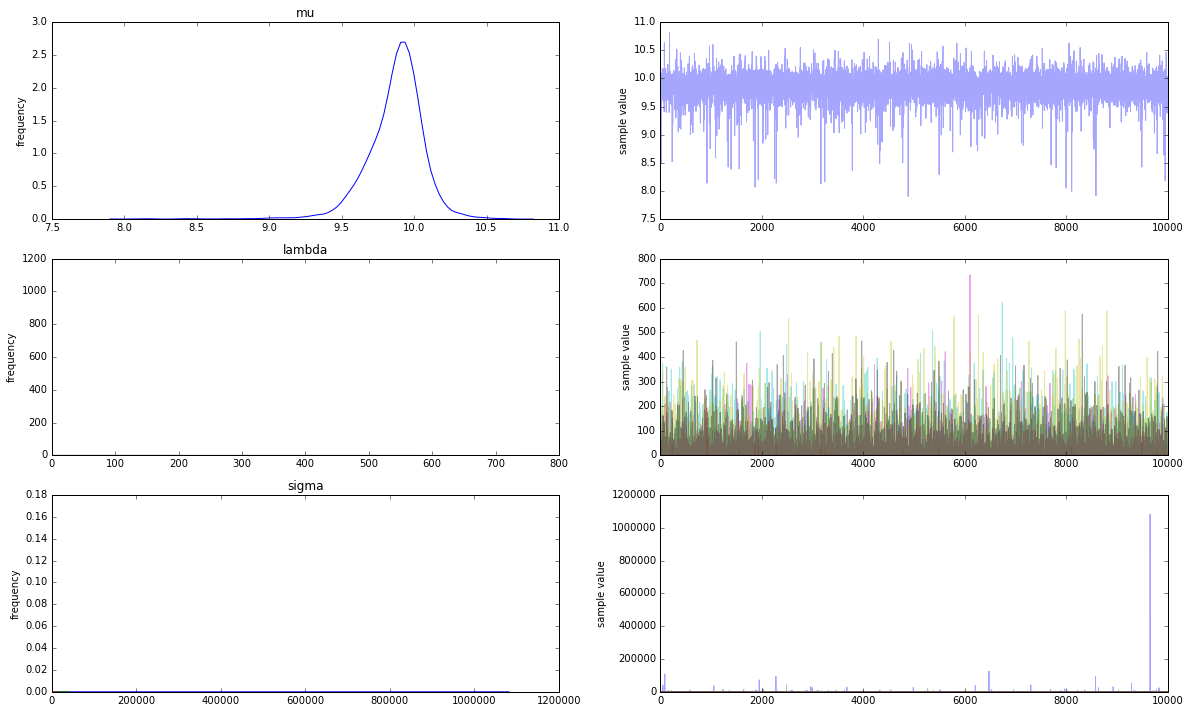

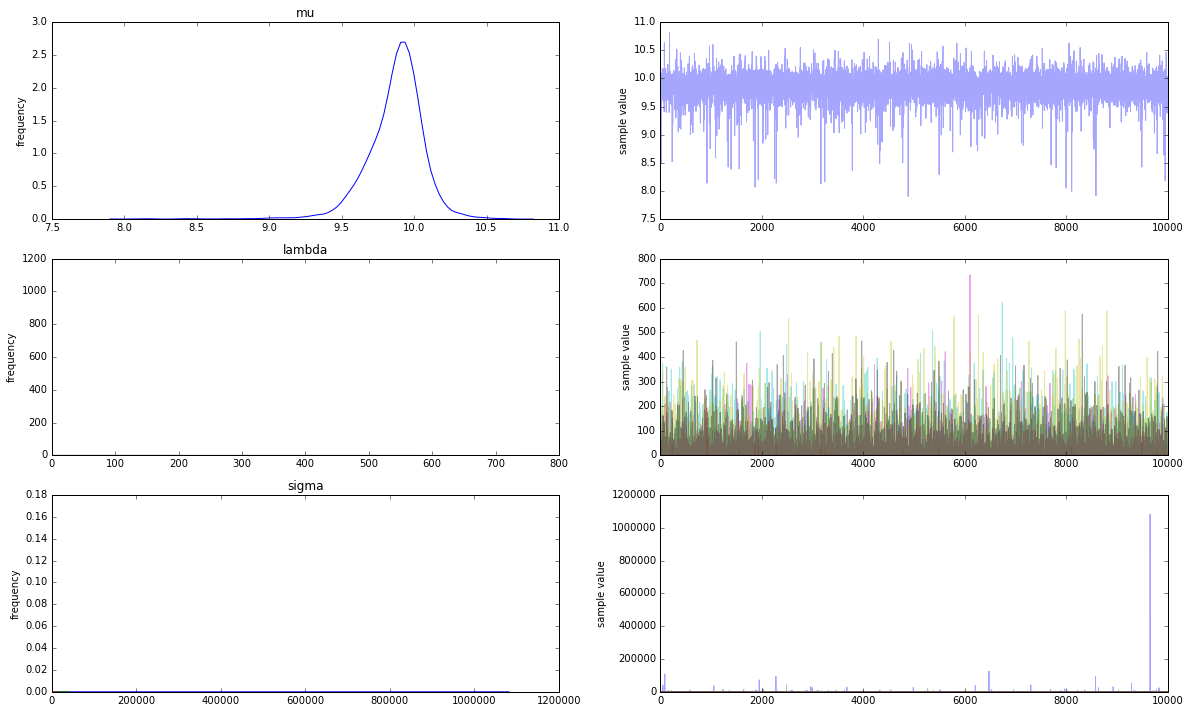

In [11]:
from IPython.core.pylabtools import figsize
figsize(20, 12)

fit.plot()